In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import linalg as LA
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table


C:\Users\admin\AppData\Local\Temp\ipykernel_10040\1462336640.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  A.thumbnail(maxsize, Image.ANTIALIAS)


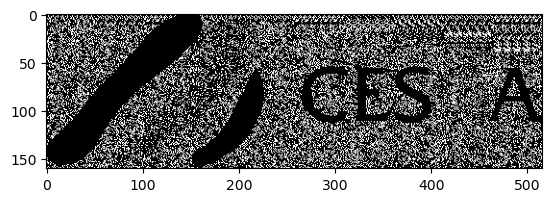

In [2]:
A=Image.open("cesga_unha_tinta.jpg").convert("1")
maxsize=(A.size[0]//4,A.size[1]//4)
A.thumbnail(maxsize, Image.ANTIALIAS)
im_arr = (np.array(A)==False).astype(np.int8)
plt.imshow(im_arr, cmap='Greys' )

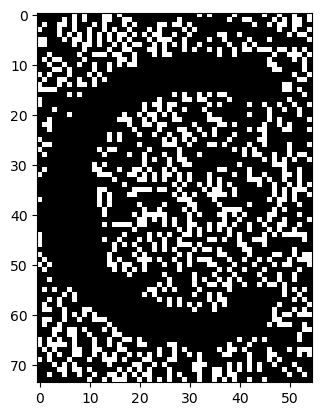

In [3]:
im_crop=im_arr[46:120,265:320]
#im_crop=im_arr[46:60,265:300]
plt.imshow(im_crop, cmap='Greys' )

In [4]:
number_of_qubits=int(np.ceil(np.log2(im_crop.shape[0]*im_crop.shape[1])))
print(number_of_qubits)

12


In [5]:
Vector=np.zeros((2**number_of_qubits))
print("Print %d qubits can store %d elements."%(number_of_qubits,Vector.shape[0]))

Print 12 qubits can store 4096 elements.


In [6]:
shape=im_crop.shape[0]*im_crop.shape[1]
Vector[0:shape]=im_crop.reshape((shape))

In [7]:
from numpy import linalg as LA
norma=LA.norm(Vector)
Vnorma=Vector/norma

In [8]:
circuit=QuantumCircuit(number_of_qubits,number_of_qubits,name="EDGE")
qreg=circuit.qregs[0]

In [9]:
from qiskit.aqua.components.initial_states import Custom

ModuleNotFoundError: No module named 'qiskit.aqua'

In [ ]:
pip install qiskit


In [ ]:
import numpy as np
CreateState=Custom(number_of_qubits,state_vector=Vnorma)